#### <span style = "color:green; font-size:40px">Covid-19 Customed X-ray Project</span>

**_______________________________________________________________________________**

### Import neccessary libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras import Sequential,layers
from glob import glob
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Fetch the data

In [2]:
covid19=glob('COVID19/*.jpeg')
normal=glob('NORMAL/*.png')[:100]
pneumonia=glob('PNEUMONIA/*.png')[:100]




### Check the number of images in all data

In [3]:
print(f'Number of images in covid-19 is {len(covid19)}')
print(f'Number of images in normal is {len(normal)}')
print(f'Number of images in pneumonia is {len(pneumonia)}')

Number of images in covid-19 is 191
Number of images in normal is 100
Number of images in pneumonia is 100


### Check the datatype of images(covid-19,normal and pneumonia)

In [4]:
print(f'Data type of images in covid19 is {type(covid19)}')
print(f'Data type of images in normal  is {type(normal)}')
print(f'Data type of images in pneumonia is {type(pneumonia)}')

Data type of images in covid19 is <class 'list'>
Data type of images in normal  is <class 'list'>
Data type of images in pneumonia is <class 'list'>


### Create a list with the images & a separate one with its corresponding labels

In [5]:
images=[]
labels=[]

for i in covid19:
    img=plt.imread(i)
    images.append(img)
    labels.append(0)

for i in normal:
    img=plt.imread(i)
    images.append(img)
    labels.append(1)
    
for i in pneumonia:
    img=plt.imread(i)
    images.append(img)
    labels.append(2)

### Shuffle the images & labels

In [6]:
images,labels=shuffle(images,labels,random_state=100)

### Plot a few images from covid19,normal & pneumonia

In [7]:
classes={0:'Covid19',1:'Normal',2:'Pneumonia'}

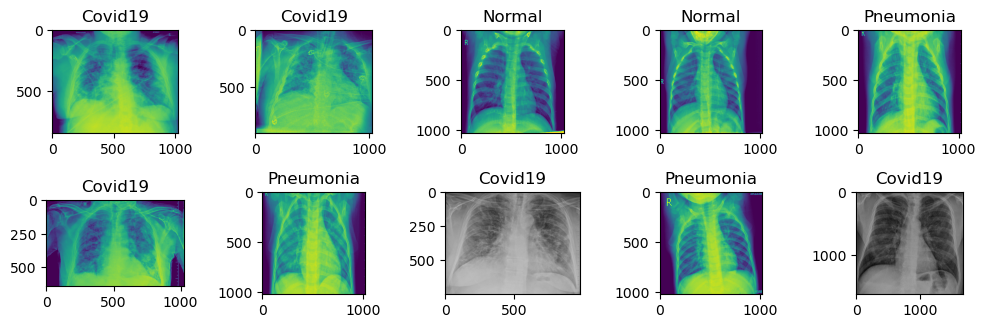

In [8]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()    

### Resize the images of 64x64

In [9]:
x=[]
for i in images:
    x.append(resize(i,(64,64,3)))

### Check the datatype of x & labels

In [10]:
print(f'data type of x is {type(x)}')
print(f'data type of labels is {type(labels)}')

data type of x is <class 'list'>
data type of labels is <class 'list'>


### Convert x & y to numpy array 

In [11]:
y=np.array(labels)

In [12]:
x=np.array(x)

### Check the shape of x and y

In [28]:
print(f'Shape of x is {x.shape}')
print(f'Shape of y is {y.shape}')

Shape of x is (391, 64, 64, 3)
Shape of y is (391,)


### Split the x & y(x_train,x_test,y_train & y_test)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Create keras sequential model with 2 convolution layer,Flatten & a hidden layer

In [15]:
model=keras.models.Sequential([
    keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(3,activation='sigmoid')
    
])

### Compile model

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Train the model

In [17]:
model.fit(X_train,y_train,epochs=5,validation_split=0.05)

Epoch 1/5


10/10 [==============================] - 3s 82ms/step - loss: 0.9833 - accuracy: 0.5743 - val_loss: 0.8238 - val_accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 0s 46ms/step - loss: 0.7173 - accuracy: 0.6824 - val_loss: 0.5740 - val_accuracy: 0.6875
Epoch 3/5
10/10 [==============================] - 0s 44ms/step - loss: 0.4502 - accuracy: 0.8209 - val_loss: 0.4550 - val_accuracy: 0.7500
Epoch 4/5
10/10 [==============================] - 0s 43ms/step - loss: 0.4067 - accuracy: 0.8007 - val_loss: 0.8098 - val_accuracy: 0.6250
Epoch 5/5
10/10 [==============================] - 0s 44ms/step - loss: 0.4154 - accuracy: 0.8142 - val_loss: 0.5421 - val_accuracy: 0.8125


### Evaluate the model

In [18]:
model.evaluate(X_train,y_train)

10/10 [==============================] - 0s 15ms/step - loss: 0.4253 - accuracy: 0.8205


[0.4253375828266144, 0.8205128312110901]

### Make prediction with x

In [19]:
prediction=model.predict(X_test)

3/3 [==============================] - 0s 16ms/step


### Our prediction is numbers ranging from 0-1.We can convert values less than 0.5 to 1 & rest to 1.

In [20]:
prediction=[np.argmax(i) for i in prediction]

In [21]:
X_test=[np.argmax(i) for i in X_test]

### Plot confusion matrix on a heatmap

<Axes: >

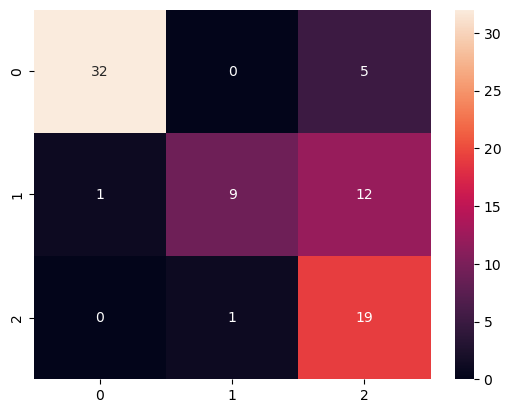

In [22]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        37
           1       0.90      0.41      0.56        22
           2       0.53      0.95      0.68        20

    accuracy                           0.76        79
   macro avg       0.80      0.74      0.72        79
weighted avg       0.84      0.76      0.76        79

